In [124]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [125]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
file_path = "/content/drive/MyDrive/turkiye-student-evaluation_generic.csv"
df = pd.read_csv(file_path)
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [127]:
clustering1 = KMeans(n_clusters=3)

In [128]:
clustering1.fit(df[['nb.repeat']])

KMeans(n_clusters=3)

In [129]:
clustering1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [130]:
df['nb.repeat cluster'] = clustering1.labels_
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,nb.repeat cluster
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [131]:
df['nb.repeat cluster'].value_counts()

0    4909
1     576
2     335
Name: nb.repeat cluster, dtype: int64

In [132]:
clustering1.inertia_

6.184586296759135e-27

In [133]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['nb.repeat']])
    intertia_scores.append(kmeans.inertia_)

In [134]:
intertia_scores

[1649.244673539566,
 211.81119648737712,
 6.184586296759135e-27,
 6.184586296759135e-27,
 6.475781511746641e-27,
 6.774540238811744e-27,
 7.080862477954445e-27,
 7.394748229174743e-27,
 7.394748229174743e-27,
 7.71619749247264e-27]

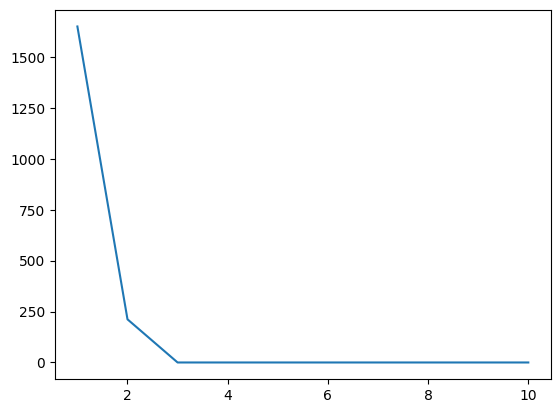

In [135]:
plt.plot(range(1,11),intertia_scores)

In [136]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'nb.repeat cluster'],
      dtype='object')

In [137]:
df.groupby('nb.repeat cluster')['Q10', 'class','difficulty'].mean()

,Q10,class,difficulty
nb.repeat cluster,,,
0,3.106335,7.138928,2.721328
1,3.020833,7.802083,3.041667
2,2.982090,8.385075,3.250746


In [139]:
# Select the columns Q1 to Q28 for clustering
selected_columns = df.iloc[:, 6:34]

In [140]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)


In [141]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

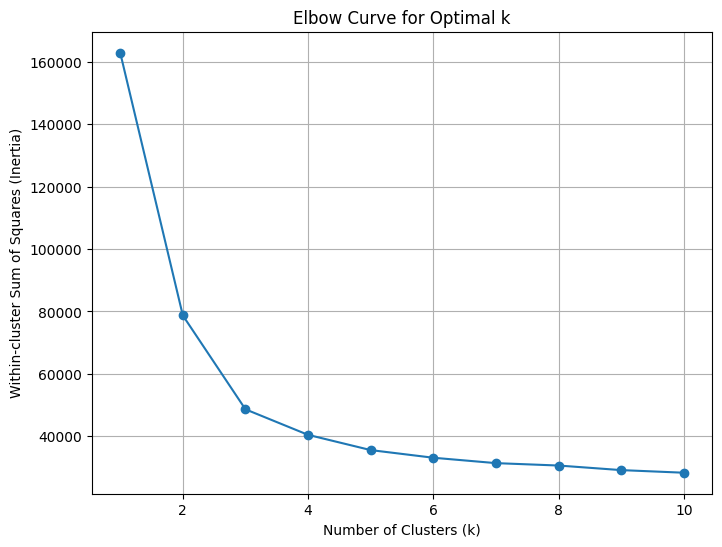

In [142]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve for Optimal k')
plt.grid()
plt.show()

In [143]:

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

In [144]:

df['Cluster'] = cluster_labels

In [145]:

df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,nb.repeat cluster,Cluster
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,0
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,0
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,0,1
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,0
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,3


In [146]:
# Perform PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

df['Cluster'] = cluster_labels

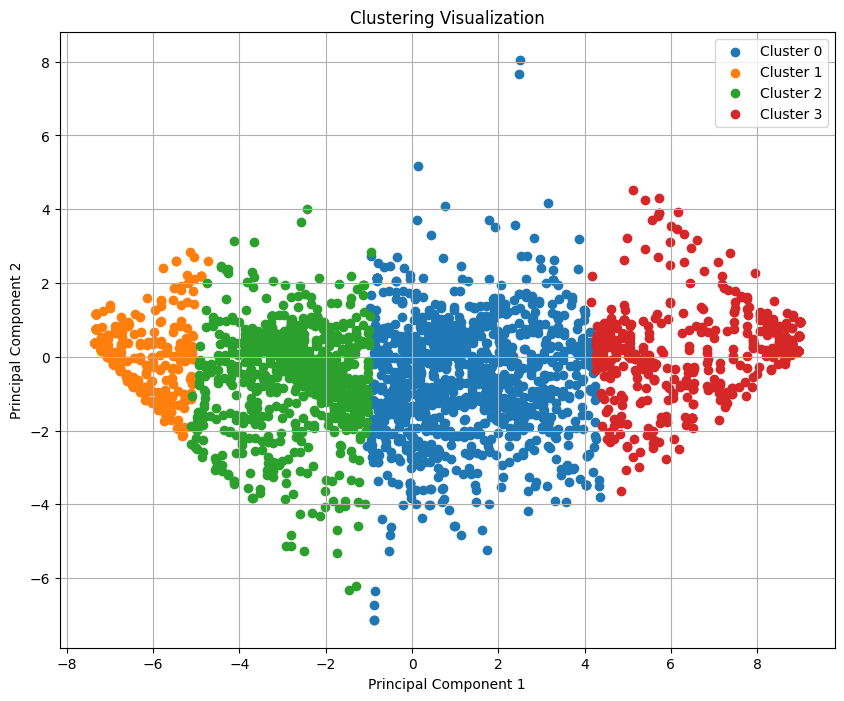

In [147]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(4):
    cluster_data = pca_data[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.legend()
plt.grid()
plt.show()

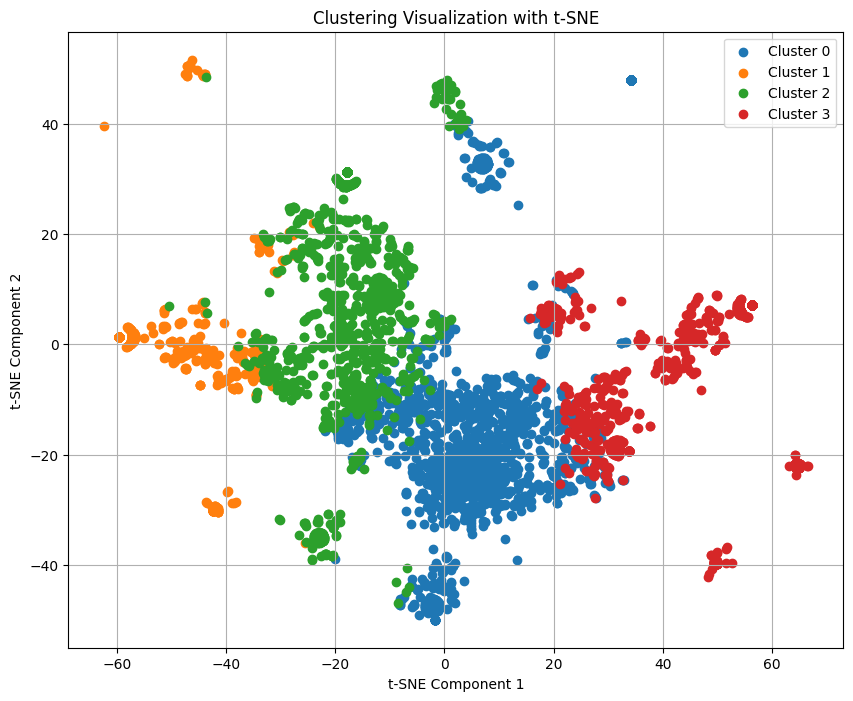

In [148]:
# Perform t-SNE to reduce dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)


kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)


df['Cluster'] = cluster_labels


plt.figure(figsize=(10, 8))
for cluster_id in range(4):
    cluster_data = tsne_data[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clustering Visualization with t-SNE')
plt.legend()
plt.grid()
plt.show()


In [149]:
cluster_means = df.groupby('Cluster').mean().iloc[:, 6:34]
cluster_means


,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,nb.repeat cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.762198,2.934154,2.796779,2.793463,2.832781,2.759829,2.734249,2.901942,2.761724,2.918048,...,3.060635,3.095216,3.102795,2.907153,2.861203,3.104690,2.961630,2.874941,3.110374,0.235433
1,4.819026,4.851508,4.802784,4.889791,4.890951,4.870070,4.852668,4.868910,4.902552,4.890951,...,4.951276,4.944316,4.958237,4.941995,4.912993,4.948956,4.914153,4.864269,4.925754,0.199536
2,3.772480,3.838865,3.747133,3.818950,3.764635,3.730839,3.694629,3.827399,3.815932,3.882921,...,4.066385,4.077852,4.085697,3.995172,3.945081,4.060350,3.990947,3.906457,4.060350,0.170187
3,1.389916,1.481513,1.417647,1.374790,1.387395,1.378151,1.367227,1.479832,1.352101,1.445378,...,1.389916,1.425210,1.440336,1.359664,1.360504,1.454622,1.388235,1.366387,1.439496,0.247899


In [150]:
file_path = "/content/drive/MyDrive/turkiye-student-evaluation_generic.csv"
df = pd.read_csv(file_path)


In [151]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [152]:
X = df.drop(['nb.repeat'],axis=1)
y = df['nb.repeat']

In [153]:
X.head()

,instr,class,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,0,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,2,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [154]:
y.value_counts()

1    4909
2     576
3     335
Name: nb.repeat, dtype: int64

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [157]:
y_pred = model.predict(X_test)

In [158]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_rep)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

           1       0.84      1.00      0.91       976
           2       1.00      0.01      0.02       112
           3       0.00      0.00      0.00        76

    accuracy                           0.84      1164
   macro avg       0.61      0.34      0.31      1164
weighted avg       0.80      0.84      0.77      1164

Accuracy: 0.84


In [159]:
# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [160]:
# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification= classification_report(y_test, rf_y_pred)

In [161]:
print("Random Forest Classifier:")
print(rf_classification)
print(f"Accuracy: {rf_accuracy:.2f}\n")

Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.87      0.89      0.88       976
           2       0.26      0.21      0.23       112
           3       0.20      0.21      0.21        76

    accuracy                           0.78      1164
   macro avg       0.45      0.44      0.44      1164
weighted avg       0.77      0.78      0.78      1164

Accuracy: 0.78

